<a href="https://colab.research.google.com/github/Sarahdine/Sarah-Dine/blob/main/C%C3%B3pia_de_Aula_2_pr%C3%A1tica_e_intuitiva_sobre_Redes_Neurais_Ex1_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Um exemplo simples em Python que demonstra como um único neurônio pode aprender. O código vai incluir:

1. Um dataset fictício.

2. A possibilidade de escolher entre diferentes funções de ativação (Sigmóide, ReLU e Tangente Hiperbólica).

3. Um loop de treinamento onde o neurônio ajusta seus pesos para minimizar o erro.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Derivadas das funções de ativação (para o gradiente)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Dataset fictício (problema de classificação binária)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas
y = np.array([[1], [1], [1], [1]])              # Saídas esperadas

# Hiperparâmetros(pede para calcular mais rapido)
learning_rate = 0.1
epochs = 100

# Inicialização dos pesos e viés
np.random.seed(42)
weights = np.random.randn(2, 1)
bias = np.random.randn()

# Escolha da função de ativação(Pode colocar em modo relu onde esta o sigmoid )
activation_function = sigmoid
activation_derivative = sigmoid_derivative

# Treinamento do neurônio (quantidade de vezes)
errors = []
for epoch in range(epochs):
    # Forward pass
    weighted_sum = np.dot(X, weights) + bias
    output = activation_function(weighted_sum)

    # Cálculo do erro (erro quadrático médio)
    error = y - output
    errors.append(np.mean(np.square(error)))

    # Backpropagation (ajuste dos pesos e viés)(corrigir o peso do y..o resultado)
    d_error = -2 * error / len(X)  # Derivada do erro quadrático
    d_output = activation_derivative(weighted_sum)
    gradient = d_error * d_output

    weights -= learning_rate * np.dot(X.T, gradient)
    bias -= learning_rate * np.sum(gradient)

    # Exibir progresso a cada 100 épocas
    if epoch % 100 == 0:
        print(f"Época {epoch}, Erro: {errors[-1]}")


Época 0, Erro: 0.09722055705270155


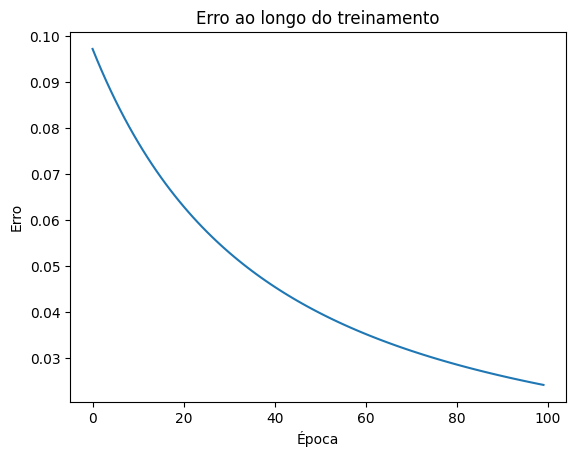


Teste do neurônio treinado:
Entrada: [0 0], Saída esperada: [1], Saída do neurônio: [0.79319077]
Entrada: [0 1], Saída esperada: [1], Saída do neurônio: [0.82407106]
Entrada: [1 0], Saída esperada: [1], Saída do neurônio: [0.88629997]
Entrada: [1 1], Saída esperada: [1], Saída do neurônio: [0.90494353]


In [5]:
# Plot do erro ao longo do treinamento(colocando no grafico)
plt.plot(range(epochs), errors)
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()

# Teste do neurônio treinado
print("\nTeste do neurônio treinado:")
for i in range(len(X)):
    weighted_sum = np.dot(X[i], weights) + bias
    output = activation_function(weighted_sum)
    print(f"Entrada: {X[i]}, Saída esperada: {y[i]}, Saída do neurônio: {output}")